In [203]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import glob
import shutil

import swat
#import sys
import os
os.environ['CAS_CLIENT_SSL_CA_LIST']='/opt/sas/viya/config/etc/SASSecurityCertificateFramework/cacerts/vault-ca.crt'
import pandas as pd


from dlpy.images import ImageTable

%matplotlib inline

s = swat.CAS("sas-instance", 5570, "sasdemo01", "demopw")

s.builtins.actionSetInfo()
s.loadactionset('table')
s.loadactionset('image')
#s.loadactionset('deepLearn')

s.loadactionset('svm')
s.loadactionset('autotune')
s.loadactionset('astore')

NOTE: Added action set 'table'.
NOTE: Added action set 'image'.
NOTE: Added action set 'svm'.
NOTE: Added action set 'autotune'.
NOTE: Added action set 'astore'.


[actionset]

 'astore'

+ Elapsed: 0.00246s, user: 0.000145s, sys: 0.00227s, mem: 0.195mb

# Read photos (*.bmp) from 2 folders & ready statistics

In [204]:
Grey_Path = "/home/sasdemo01/data/gbr/白霧光/"
BW_Path = "/home/sasdemo01/data/gbr/一般光/"


BMP_STAT=pd.DataFrame(columns = ["File","std","mean",
                                 'p0','p5','p10','p20','p25','p30','p40','p50','p60','p70','p75','p80','p90',"p95","p100",
                                 "Grp","Grp_Name"])

for i in range(2):
    if i == 0:
        path=Grey_Path
        grp_name= "Grey"
    else:
        path=BW_Path
        grp_name = "B&W"
    Cnt=0
    for file in glob.glob(path + "*.bmp"):
        Cnt=Cnt+1
        img_gs=cv.imread(file,0)
        std=np.std(img_gs)
        mean=np.mean(img_gs)
        p0=np.percentile(img_gs,0)
        p5=np.percentile(img_gs,5)
        p10=np.percentile(img_gs,10)
        p20=np.percentile(img_gs,20)
        p25=np.percentile(img_gs,25)
        p30=np.percentile(img_gs,30)
        p40=np.percentile(img_gs,40)
        p50=np.percentile(img_gs,50)
        p60=np.percentile(img_gs,60)  
        p70=np.percentile(img_gs,60)          
        p75=np.percentile(img_gs,75)
        p80=np.percentile(img_gs,80)  
        p90=np.percentile(img_gs,90)  
        p95=np.percentile(img_gs,95)
        p100=np.percentile(img_gs,100)
        grp=float(i)
        BMP_STAT = BMP_STAT.append({'File':file,'std':std,'p50':p50,'p5':p5,'p95':p95,'p100':p100,'p0':p0,'p75':p75,'p25':p25,
                                    'Grp':grp,'Grp_Name':grp_name,
                                    'p10':p10,'p20':p20,'p30':p30,'p40':p40,'p60':p60,'p70':p70,'p80':p80,'p90':p90,'mean':mean}
                                   
                                   ,ignore_index=True)
    print(path,':',Cnt)

/home/sasdemo01/data/gbr/白霧光/ : 3045
/home/sasdemo01/data/gbr/一般光/ : 3006


In [205]:
BMP_STAT['p95-p5'] = BMP_STAT['p95']-BMP_STAT['p5']
BMP_STAT['p95/p5'] = BMP_STAT['p95']/BMP_STAT['p5']
BMP_STAT['range'] = BMP_STAT['p100']-BMP_STAT['p0']
BMP_STAT['max/min'] = BMP_STAT['p100']/BMP_STAT['p0']
BMP_STAT['IQR'] = BMP_STAT['p75']-BMP_STAT['p25']
BMP_STAT['p75/p25'] = BMP_STAT['p75']/BMP_STAT['p25']
BMP_STAT.head()

,File,std,mean,p0,p5,p10,p20,p25,p30,p40,...,p95,p100,Grp,Grp_Name,p95-p5,p95/p5,range,max/min,IQR,p75/p25
0,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,12.818609,92.8528,49.0,68.0,75.0,81.0,84.0,87.0,94.0,...,108.0,120.0,0.0,Grey,40.0,1.588235,71.0,2.448980,18.0,1.214286
1,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,10.949388,97.0033,52.0,76.0,81.0,87.0,90.0,92.0,97.0,...,111.0,122.0,0.0,Grey,35.0,1.460526,70.0,2.346154,15.0,1.166667
2,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,16.124005,87.1147,40.0,51.0,56.0,75.0,84.0,88.0,91.0,...,103.0,128.0,0.0,Grey,52.0,2.019608,88.0,3.200000,13.0,1.154762
3,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,15.766659,93.0127,52.0,62.0,66.0,76.0,82.0,88.0,96.0,...,110.0,121.0,0.0,Grey,48.0,1.774194,69.0,2.326923,23.0,1.280488
4,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,12.013688,95.3882,50.0,73.0,77.0,84.0,87.0,90.0,96.0,...,110.0,123.0,0.0,Grey,37.0,1.506849,73.0,2.460000,18.0,1.206897


In [206]:
#BMP_STAT.info(verbose=True)

# Data Explore: 看像素的統計量們區分2種光源的能力

In [207]:
#print("黃點:白霧光   紫點:一般光")
#print("(x,y)=(p5,p50)")
#BMP_STAT.plot.scatter(x='p5',y='p50',c='Grp',colormap='viridis')
#plt.show()
#print("(x,y)=(p50,p95)")
##BMP_STAT.plot.scatter(x='p50',y='p95',c='Grp',colormap='viridis')
#plt.show()
#print("(x,y)=(p5,p95)")
#BMP_STAT.plot.scatter(x='p5',y='p95',c='Grp',colormap='viridis')
#plt.show()


黃點:白霧光   紫點:一般光


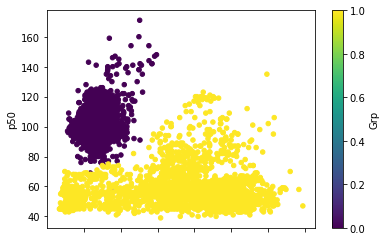

In [208]:
print("黃點:白霧光   紫點:一般光")
BMP_STAT.plot.scatter(x='std',y='p50',c='Grp',colormap='viridis')
plt.show()

In [209]:
Check=BMP_STAT[(BMP_STAT['p50']<70)&(BMP_STAT['std']<20)&(BMP_STAT['Grp']==0)].File.reset_index(drop=True)
type(Check)

pandas.core.series.Series

0 /home/sasdemo01/data/gbr/白霧光/NG001_Panel0002_ProcA2_Shot0_V26_D6_Img.bmp


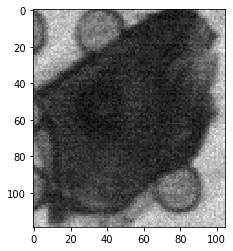

1 /home/sasdemo01/data/gbr/白霧光/NG002_Panel0009_ProcA1_Shot0_V14_D3_Img.bmp


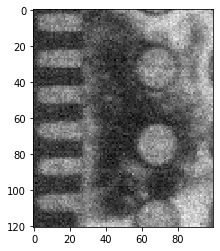

In [210]:
for i in range(Check.shape[0]):
    print(i,Check[i])
    plt.imshow(plt.imread(Check[i]),cmap='gray')
    plt.show()

In [211]:
#print("黃點:白霧光   紫點:一般光")
#BMP_STAT.plot.scatter(x='p50',y='range',c='Grp',colormap='viridis')
#plt.show()

In [212]:
#print("黃點:白霧光   紫點:一般光")
#BMP_STAT.plot.scatter(x='p50',y='IQR',c='Grp',colormap='viridis')
#plt.show()

# Ready a CAS Table to Train SVM with VDMML

In [213]:
BMP_STAT_CAS_TABLE = s.upload(BMP_STAT)['casTable']

NOTE: Cloud Analytic Services made the uploaded file available as table TMP4S2AU77R in caslib CASUSER(sasdemo01).
NOTE: The table TMP4S2AU77R has been created in caslib CASUSER(sasdemo01) from binary data uploaded to Cloud Analytic Services.


In [214]:
BMP_STAT_CAS_TABLE

CASTable('TMP4S2AU77R', caslib='CASUSER(sasdemo01)')

In [215]:
BMP_STAT_CAS_TABLE.name

'TMP4S2AU77R'

In [216]:
BMP_STAT_CAS_TABLE.head()

,File,std,mean,p0,p5,p10,p20,p25,p30,p40,...,p95,p100,Grp,Grp_Name,p95-p5,p95/p5,range,max/min,IQR,p75/p25
0,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,12.818609,92.8528,49.0,68.0,75.0,81.0,84.0,87.0,94.0,...,108.0,120.0,0.0,Grey,40.0,1.588235,71.0,2.448980,18.0,1.214286
1,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,10.949388,97.0033,52.0,76.0,81.0,87.0,90.0,92.0,97.0,...,111.0,122.0,0.0,Grey,35.0,1.460526,70.0,2.346154,15.0,1.166667
2,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,16.124005,87.1147,40.0,51.0,56.0,75.0,84.0,88.0,91.0,...,103.0,128.0,0.0,Grey,52.0,2.019608,88.0,3.200000,13.0,1.154762
3,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,15.766659,93.0127,52.0,62.0,66.0,76.0,82.0,88.0,96.0,...,110.0,121.0,0.0,Grey,48.0,1.774194,69.0,2.326923,23.0,1.280488
4,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,12.013688,95.3882,50.0,73.0,77.0,84.0,87.0,90.0,96.0,...,110.0,123.0,0.0,Grey,37.0,1.506849,73.0,2.460000,18.0,1.206897


In [217]:
svm_result = s.svmTrain(
                        table = BMP_STAT_CAS_TABLE,
                        nominals = {'Grp_Name'},
                        inputs = {'std','mean',
                                  'p0','p5','p10','p20','p25','p30','p40','p50','p60','p70','p75','p80','p90','p95','p100',
                                  'p95-p5','p95/p5','range','max/min','IQR','p75/p25'
                                    },
                     #   inputs = {'std','p50','p5','p95','p0','p100','p25','p75'}  ,    
                        target = 'Grp_Name',
                        #maxiter = 25,
                        #C=1,
                        #Tolerance = 1e-06,         
                        Kernel = 'POLYNOMIAL',#'RBF',
                        degree = 3,
                        savestate = {'name':'svm_model_1','replace':True}
)


NOTE: SVM training is activated.
NOTE: Wrote 31729 bytes to the savestate file svm_model_1.


In [218]:
print(svm_result.ModelInfo)
print('---------------------------------------------------------------------')
print(svm_result.Misclassification)
print('---------------------------------------------------------------------')
print(svm_result.FitStatistics)

Model Information

           RowId                   Descr           Value     NValue
0       TaskType               Task Type          C_CLAS        NaN
1         Method  Optimization Technique  Interior Point        NaN
2          Scale                   Scale             YES        NaN
3         Kernel         Kernel Function      Polynomial        NaN
4         degree           Kernel Degree               3   3.000000
5  PenaltyMethod          Penalty Method               C        NaN
6              C       Penalty Parameter               1   1.000000
7        MaxIter      Maximum Iterations              25  25.000000
8      Tolerance               Tolerance           1e-06   0.000001
---------------------------------------------------------------------
Misclassification Matrix

  Observed  PredEvent  PredNonEvent  TotalTrain
0      B&W     3006.0           0.0      3006.0
1     Grey        2.0        3043.0      3045.0
2    Total     3008.0        3043.0      6051.0
-------------

In [219]:
svm_result

[ModelInfo]

 Model Information
 
            RowId                   Descr           Value     NValue
 0       TaskType               Task Type          C_CLAS        NaN
 1         Method  Optimization Technique  Interior Point        NaN
 2          Scale                   Scale             YES        NaN
 3         Kernel         Kernel Function      Polynomial        NaN
 4         degree           Kernel Degree               3   3.000000
 5  PenaltyMethod          Penalty Method               C        NaN
 6              C       Penalty Parameter               1   1.000000
 7        MaxIter      Maximum Iterations              25  25.000000
 8      Tolerance               Tolerance           1e-06   0.000001

[NObs]

 Observations
 
                          Descr       N
 0  Number of Observations Read  6051.0
 1  Number of Observations Used  6051.0

[TrainingResult]

 Training Results
 
           RowId                                Descr        Value
 0            WW             Inner Product of Weights    27.534673
 1          Beta                                 Bias    -4.795233
 2    TotalSlack  Total Slack (Constraint Violations)    29.963355
 3    LongVector               Norm of Longest Vector    60.141873
 4      nSupport            Number of Support Vectors  5430.000000
 5   nSupportInM  Number of Support Vectors on Margin     0.000000
 6      MaximumF                            Maximum F    67.469755
 7      MinimumF                            Minimum F   -73.063756
 8      nEffects                    Number of Effects    23.000000
 9       nLevels               Columns in Data Matrix    23.000000
 10   MatrixSize             Columns in Kernel Matrix  2600.000000

[IterHistory]

 Iteration History
 
     Iteration  Complementarity   Feasibility
 0         1.0     1.001958e+06  2.801398e+06
 1         2.0     1.124013e+03  1.748898e+03
 2         3.0     4.564787e+02  6.835431e+02
 3         4.0     1.158156e+02  9.540992e+01
 4         5.0     1.323074e+01  6.426296e+00
 5         6.0     4.027285e+00  1.282592e+00
 6         7.0     3.148242e+00  9.366040e-01
 7         8.0     2.138650e+00  5.678271e-01
 8         9.0     1.309962e+00  2.374257e-01
 9        10.0     9.034100e-01  1.043332e-01
 10       11.0     8.918360e-01  9.078744e-02
 11       12.0     8.765658e-01  7.481058e-02
 12       13.0     2.994746e-01  7.635866e-03
 13       14.0     1.722161e-01  2.166992e-03
 14       15.0     8.515609e-02  2.168288e-11
 15       16.0     3.406740e-02  3.674228e-12
 16       17.0     1.996694e-02  1.063372e-12
 17       18.0     1.314632e-02  2.040590e-13
 18       19.0     7.812072e-03  7.804868e-14
 19       20.0     7.559360e-03  7.074896e-14
 20       21.0     6.403711e-03  5.684342e-14
 21       22.0     6.083389e-03  4.973799e-14
 22       23.0     5.124969e-03  6.483702e-14
 23       24.0     4.541841e-03  4.973799e-14
 24       25.0     4.142484e-03  7.105427e-14

[Misclassification]

 Misclassification Matrix
 
   Observed  PredEvent  PredNonEvent  TotalTrain
 0      B&W     3006.0           0.0      3006.0
 1     Grey        2.0        3043.0      3045.0
 2    Total     3008.0        3043.0      6051.0

[FitStatistics]

 Fit Statistics
 
      Statistic  Training
 0     Accuracy  0.999669
 1        Error  0.000331
 2  Sensitivity  1.000000
 3  Specificity  0.999343

+ Elapsed: 10.2s, user: 42.8s, sys: 3.36s, mem: 3.74e+03mb

In [220]:
s.aStore.score(
                table=BMP_STAT_CAS_TABLE,
                out={'name':'svm_score','replace':True},
                rstore='svm_model_1'
)
s.CASTable('svm_score').head()

,_P_,P_Grp_NameB_W,P_Grp_NameGrey,I_Grp_Name,_WARN_
0,8.233381,0.438985,0.561015,Grey,
1,10.067782,0.425390,0.574610,Grey,
2,6.139792,0.454500,0.545500,Grey,
3,8.400053,0.437749,0.562251,Grey,
4,9.286216,0.431182,0.568818,Grey,


In [221]:
pd_pred_out=pd.DataFrame(s.CASTable('svm_score').to_frame())
pd_pred_out.head()

,_P_,P_Grp_NameB_W,P_Grp_NameGrey,I_Grp_Name,_WARN_
0,8.233381,0.438985,0.561015,Grey,
1,10.067782,0.425390,0.574610,Grey,
2,6.139792,0.454500,0.545500,Grey,
3,8.400053,0.437749,0.562251,Grey,
4,9.286216,0.431182,0.568818,Grey,


In [222]:
pd_pred_out=pd_pred_out.join(BMP_STAT)
pd_pred_out.head()

,_P_,P_Grp_NameB_W,P_Grp_NameGrey,I_Grp_Name,_WARN_,File,std,mean,p0,p5,...,p95,p100,Grp,Grp_Name,p95-p5,p95/p5,range,max/min,IQR,p75/p25
0,8.233381,0.438985,0.561015,Grey,,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,12.818609,92.8528,49.0,68.0,...,108.0,120.0,0.0,Grey,40.0,1.588235,71.0,2.448980,18.0,1.214286
1,10.067782,0.425390,0.574610,Grey,,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,10.949388,97.0033,52.0,76.0,...,111.0,122.0,0.0,Grey,35.0,1.460526,70.0,2.346154,15.0,1.166667
2,6.139792,0.454500,0.545500,Grey,,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,16.124005,87.1147,40.0,51.0,...,103.0,128.0,0.0,Grey,52.0,2.019608,88.0,3.200000,13.0,1.154762
3,8.400053,0.437749,0.562251,Grey,,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,15.766659,93.0127,52.0,62.0,...,110.0,121.0,0.0,Grey,48.0,1.774194,69.0,2.326923,23.0,1.280488
4,9.286216,0.431182,0.568818,Grey,,/home/sasdemo01/data/gbr/白霧光/198G20760600_NG00...,12.013688,95.3882,50.0,73.0,...,110.0,123.0,0.0,Grey,37.0,1.506849,73.0,2.460000,18.0,1.206897


In [223]:
pd_pred_out.to_csv('/home/sasdemo01/data/SVM_for_2_Lights/SVM_score.csv',index=False)

In [224]:
#save SVM Model
with open('/home/sasdemo01/data/SVM_for_2_Lights/SVM_Model.sasast','wb')as file:
    file.write(s.aStore.download(rstore='svm_model_1')['blob'])

In [225]:
#pd_pred_out[(pd_pred_out.P_Grp_NameGrey>0.5) & (pd_pred_out.Grp==1)]
Check_list=pd_pred_out[(pd_pred_out.I_Grp_Name != pd_pred_out.Grp_Name)][['File','Grp_Name','I_Grp_Name','P_Grp_NameGrey','P_Grp_NameB_W']]
Check_list.head()

,File,Grp_Name,I_Grp_Name,P_Grp_NameGrey,P_Grp_NameB_W
178,/home/sasdemo01/data/gbr/白霧光/CSPAFI#6_198G2079...,Grey,B&W,0.322382,0.677618
366,/home/sasdemo01/data/gbr/白霧光/NG001_Panel0002_P...,Grey,B&W,0.334083,0.665917
397,/home/sasdemo01/data/gbr/白霧光/NG001_Panel0002_P...,Grey,B&W,0.481165,0.518835
554,/home/sasdemo01/data/gbr/白霧光/NG001_Panel0006_P...,Grey,B&W,0.383202,0.616798
741,/home/sasdemo01/data/gbr/白霧光/NG001_Panel0010_P...,Grey,B&W,0.403643,0.596357


In [226]:
Check_list.reset_index(drop=True, inplace=True)
Check_list.head()

,File,Grp_Name,I_Grp_Name,P_Grp_NameGrey,P_Grp_NameB_W
0,/home/sasdemo01/data/gbr/白霧光/CSPAFI#6_198G2079...,Grey,B&W,0.322382,0.677618
1,/home/sasdemo01/data/gbr/白霧光/NG001_Panel0002_P...,Grey,B&W,0.334083,0.665917
2,/home/sasdemo01/data/gbr/白霧光/NG001_Panel0002_P...,Grey,B&W,0.481165,0.518835
3,/home/sasdemo01/data/gbr/白霧光/NG001_Panel0006_P...,Grey,B&W,0.383202,0.616798
4,/home/sasdemo01/data/gbr/白霧光/NG001_Panel0010_P...,Grey,B&W,0.403643,0.596357


( 1 ) Grey => B&W . Grey_Prob= 0.32238183495651523


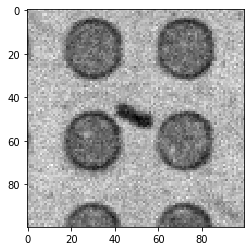

( 2 ) Grey => B&W . Grey_Prob= 0.3340832445115687


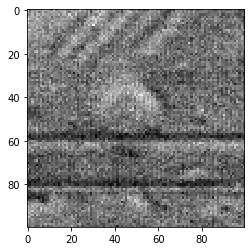

( 3 ) Grey => B&W . Grey_Prob= 0.48116511291840575


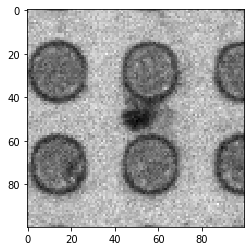

( 4 ) Grey => B&W . Grey_Prob= 0.3832016449810546


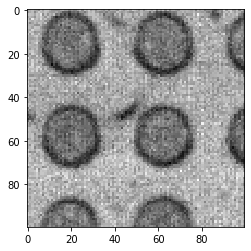

( 5 ) Grey => B&W . Grey_Prob= 0.4036431709615985


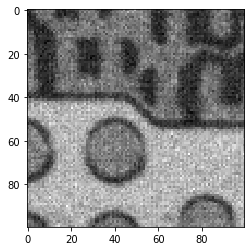

( 6 ) Grey => B&W . Grey_Prob= 0.3113248473107464


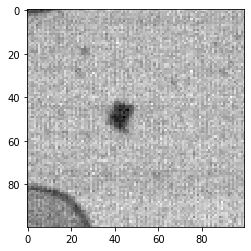

( 7 ) Grey => B&W . Grey_Prob= 0.4150703467679151


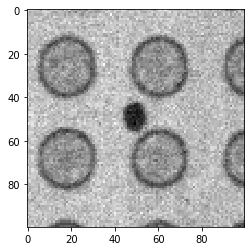

( 8 ) Grey => B&W . Grey_Prob= 0.3865750816496912


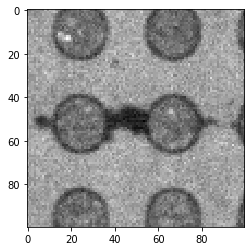

( 9 ) Grey => B&W . Grey_Prob= 0.49656731101060125


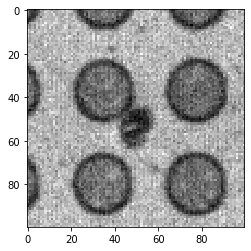

( 10 ) Grey => B&W . Grey_Prob= 0.39316928993882405


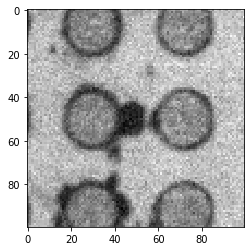

( 11 ) Grey => B&W . Grey_Prob= 0.44537958879571965


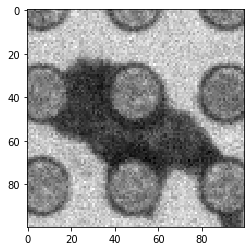

( 12 ) Grey => B&W . Grey_Prob= 0.4173906571357836


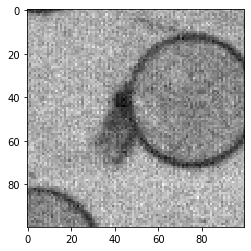

( 13 ) Grey => B&W . Grey_Prob= 0.45141592238300415


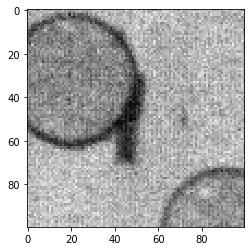

( 14 ) Grey => B&W . Grey_Prob= 0.4508352832739865


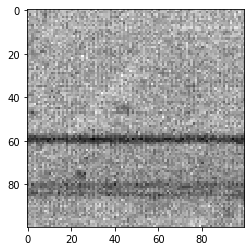

( 15 ) Grey => B&W . Grey_Prob= 0.38637055239264395


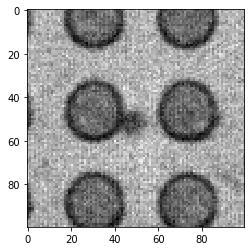

( 16 ) Grey => B&W . Grey_Prob= 0.390013710907656


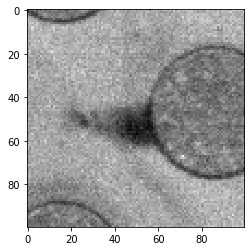

( 17 ) Grey => B&W . Grey_Prob= 0.4139475428131925


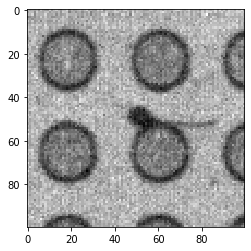

( 18 ) Grey => B&W . Grey_Prob= 0.4236407990496912


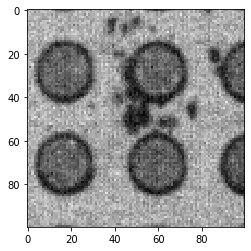

( 19 ) B&W => Grey . Grey_Prob= 0.5978840934260848


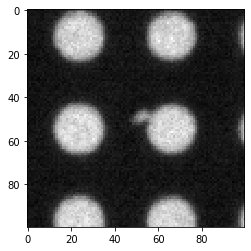

( 20 ) B&W => Grey . Grey_Prob= 0.6018842353793648


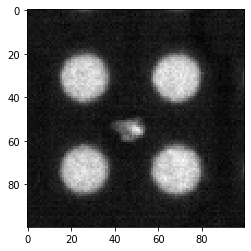

( 21 ) B&W => Grey . Grey_Prob= 0.601215303739925


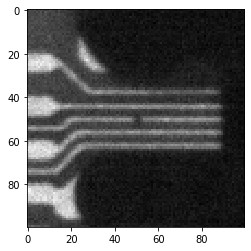

( 22 ) B&W => Grey . Grey_Prob= 0.5487525703886081


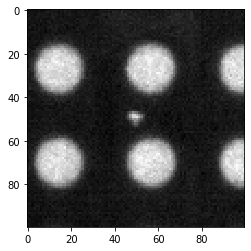

( 23 ) B&W => Grey . Grey_Prob= 0.5790141934260181


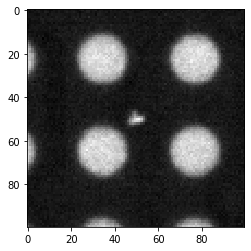

( 24 ) B&W => Grey . Grey_Prob= 0.5834406960222988


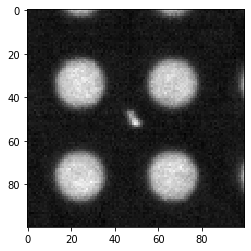

( 25 ) B&W => Grey . Grey_Prob= 0.5956485063921516


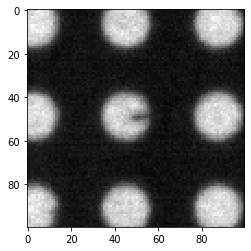

( 26 ) B&W => Grey . Grey_Prob= 0.6513796728715933


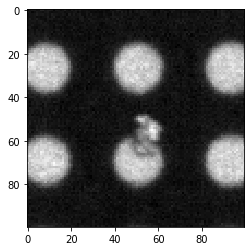

( 27 ) B&W => Grey . Grey_Prob= 0.6549819494716318


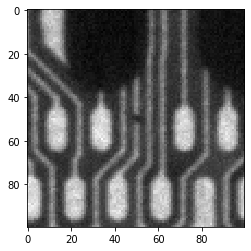

( 28 ) B&W => Grey . Grey_Prob= 0.7014395693541934


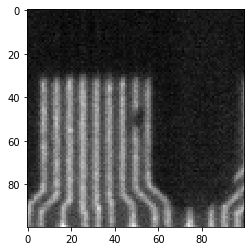

( 29 ) B&W => Grey . Grey_Prob= 0.6653486407129883


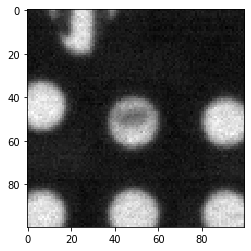

( 30 ) B&W => Grey . Grey_Prob= 0.660784649629147


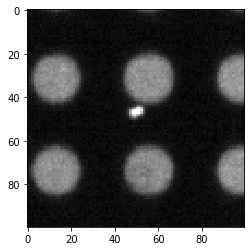

( 31 ) B&W => Grey . Grey_Prob= 0.6516999962889505


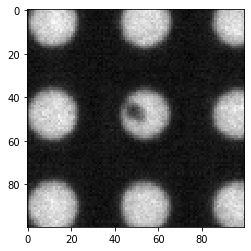

( 32 ) B&W => Grey . Grey_Prob= 0.6430886432381258


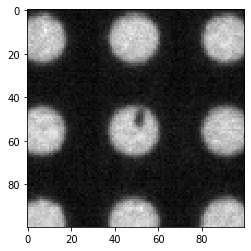

( 33 ) B&W => Grey . Grey_Prob= 0.6412923324340751


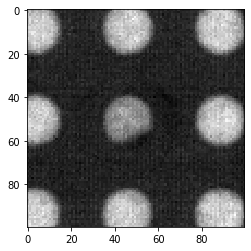

( 34 ) B&W => Grey . Grey_Prob= 0.6727600414822563


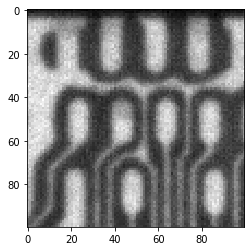

In [227]:
for i in range(Check_list.shape[0]):
    img=plt.imread(Check_list.File[i])
    print("(",i+1,")", Check_list.Grp_Name[i],'=>',Check_list.I_Grp_Name[i],". Grey_Prob=",Check_list.P_Grp_NameGrey[i])
    plt.imshow(img,cmap='gray')
    plt.show()

In [228]:
pd.crosstab(pd_pred_out.Grp_Name,pd_pred_out.I_Grp_Name,margins=True)

I_Grp_Name,B&W,Grey,All
Grp_Name,,,
B&W,2990,16,3006
Grey,18,3027,3045
All,3008,3043,6051


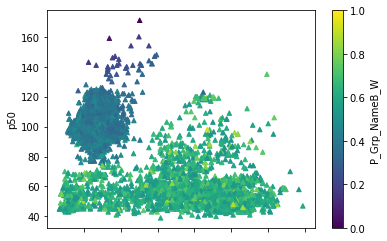

In [229]:
pd_pred_out.plot.scatter(x='std',y='p50',marker='^',c='P_Grp_NameB_W',colormap='viridis')
plt.show()

In [230]:
s.endsession()

+ Elapsed: 0.000258s, user: 0.000199s, sys: 1.7e-05s, mem: 0.198mb